In [5]:
from bmb.source.standard_import import *
from bmb                        import ProcessingDB, WarehouseDB
from matplotlib                 import pyplot as plt
import numpy as np
processing = ProcessingDB()
warehouse  = WarehouseDB()

In [2]:
warehouse.load_from_processing( processing, VERBOSE='jupyter')

  0%|          | 0/462 [00:00<?, ?it/s]

In [3]:
FILM_ID_TO_GENRES = """
SELECT g.text 
FROM FilmGenre fg JOIN Genre g ON fg.genre = g.id
WHERE fg.film=?
"""

def genre_pairs_count( film_ids):    
    genre_combinations = [ 
        warehouse.get( FILM_ID_TO_GENRES, film_id) 
        for film_id in film_ids ]
    
    pair_count = defaultdict( lambda: defaultdict( lambda: 0))
    for genres in genre_combinations:
        if len( genres) == 1:
            genre = genres[0]
            pair_count[ genre][ genre] += 1

        else:
            for g, genre in enumerate( genres):
                for i in range( g):
                    pair_count[ genres[i]][ genre] += 1
                    pair_count[ genre][ genres[i]] += 1
    return pair_count

                    
pair_count    = genre_pairs_count( warehouse.select( 'id', 'Film'))                    
genre_order    = sorted( pair_count.keys())
heatmap_values = [
    [pair_count[ inner_genre][ outer_genre]
        for inner_genre in genre_order ]
        for outer_genre in genre_order
]

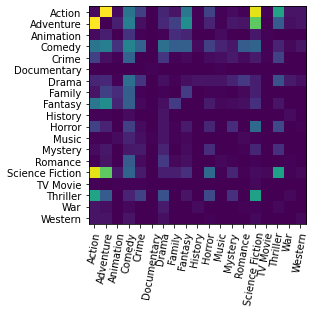

In [6]:
plt.xticks(ticks=np.arange( len( genre_order)), labels=genre_order, rotation= 80)
plt.yticks(ticks=np.arange( len( genre_order)), labels=genre_order)

plt.imshow( heatmap_values)
plt.show()